In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 1000             #(number of stars)
Rmax = 1000          #(AU)
                     #Defalut units also include Mass in solar masses.
X = np.zeros(N)
Y = np.zeros(N)
Z = np.zeros(N)

Vx = np.zeros(N)
Vy = np.zeros(N)
Vz = np.zeros(N)

In [3]:
for i in range(0,N):
    x = np.random.uniform(-Rmax,Rmax)
    y = np.random.uniform(-Rmax,Rmax)
    z = np.random.uniform(-Rmax,Rmax)
    if np.sqrt(x**2+y**2+z**2) < Rmax:
        X[i] = x    
        Y[i] = y
        Z[i] = z  
for i in range(0,N):
    Vx[i] = np.random.uniform(0,1)
    Vy[i] = np.random.uniform(0,1)
    Vz[i] = np.random.uniform(0,1)

In [5]:
# giving cluster mass 
Mass = np.zeros(N)

for i in range(0,N):
    Mass[i] = 0.2    #Creating all stars with 0.2Solar masses 

### Calculating energy balance

Using the following equation:

In [ ]:
# caclulating the energy balance of the system

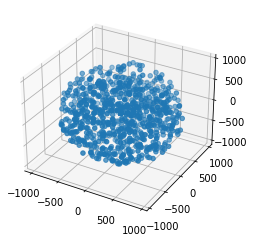

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X,Y,Z)
plt.show()